In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
df_char=pd.read_csv('E:\\3rd sem proj\\fds ko project\\archive\\training_images\\training_images.csv')


In [3]:
df_char.head()
print(df_char.shape)

(72000, 1025)


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_char['label']=le.fit_transform(df_char['label'])


In [5]:
df_char=df_char.sample(72000,random_state=42,replace=False) #randomly arranging my df as not doing so lead to poor val_accuracy
df_char.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
49196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
15208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
37382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
48769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
61528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30


In [6]:
X=df_char.drop('label',axis=1)
y=df_char['label']


In [7]:
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(1024,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(36,activation='softmax')
])


In [8]:
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(monitor='val_loss',
                       patience=20,
                       restore_best_weights=False,
                       verbose=1,
                       mode='auto',
                    min_delta=0.0001)


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model_history=model.fit(X, y, epochs=100,callbacks=callback,validation_split=0.2,batch_size=512)

Epoch 1/100
113/113 [==============================] - 7s 38ms/step - loss: 1.9015 - accuracy: 0.4896 - val_loss: 1.2204 - val_accuracy: 0.6967
Epoch 2/100
113/113 [==============================] - 4s 32ms/step - loss: 0.8804 - accuracy: 0.7454 - val_loss: 0.5976 - val_accuracy: 0.8334
Epoch 3/100
113/113 [==============================] - 4s 33ms/step - loss: 0.6057 - accuracy: 0.8221 - val_loss: 0.4012 - val_accuracy: 0.8799
Epoch 4/100
113/113 [==============================] - 4s 33ms/step - loss: 0.4762 - accuracy: 0.8576 - val_loss: 0.3045 - val_accuracy: 0.9083
Epoch 5/100
113/113 [==============================] - 5s 44ms/step - loss: 0.3853 - accuracy: 0.8834 - val_loss: 0.2635 - val_accuracy: 0.9212
Epoch 6/100
113/113 [==============================] - 5s 43ms/step - loss: 0.3274 - accuracy: 0.8996 - val_loss: 0.2365 - val_accuracy: 0.9290
Epoch 7/100
113/113 [==============================] - 5s 42ms/step - loss: 0.2810 - accuracy: 0.9131 - val_loss: 0.2275 - val_accuracy:

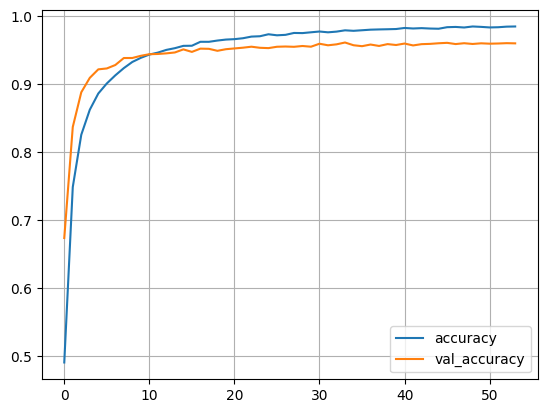

In [69]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'],label='accuracy')
plt.plot(model_history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.grid()

In [12]:
model.predict(X_test)

450/450 [==============================] - 2s 3ms/step


array([[5.8153555e-11, 2.5929738e-13, 4.5429342e-14, ..., 1.6259513e-12,
        7.0404876e-11, 1.7096394e-13],
       [8.1429698e-13, 5.9586019e-10, 5.9715337e-11, ..., 2.3245661e-12,
        1.9807860e-08, 1.4149530e-12],
       [6.6664502e-13, 7.4094697e-12, 3.9946155e-13, ..., 2.8720634e-14,
        1.1099118e-10, 8.5928088e-12],
       ...,
       [6.7636672e-14, 8.3867106e-12, 9.2755083e-12, ..., 4.0897002e-10,
        1.0256062e-13, 2.9887472e-13],
       [8.0857050e-13, 2.8910218e-12, 1.8852936e-12, ..., 1.2024210e-11,
        3.6534052e-14, 2.1052408e-11],
       [3.6228803e-10, 1.0516337e-05, 7.8002231e-06, ..., 1.5916899e-09,
        2.3504951e-09, 1.9933579e-07]], dtype=float32)

In [30]:
from PIL import Image

img=Image.open('E:\\3rd sem proj\\fds ko project\\archive\Images\\348.png').convert('L')

In [31]:
img_array=np.array(img).flatten()/255

In [32]:
x=model.predict(img_array.reshape(1,1024))
x=x.ravel()

1/1 [==============================] - 0s 42ms/step


In [33]:
x

array([2.82661716e-07, 3.06134280e-05, 1.28231337e-09, 1.17960234e-07,
       7.07953030e-09, 5.84473412e-07, 1.68998042e-08, 3.63359050e-07,
       6.86897508e-08, 4.09377385e-08, 5.80117412e-11, 6.86364388e-08,
       4.29860911e-08, 3.81904961e-08, 6.81653001e-09, 1.59189533e-08,
       6.70192833e-07, 4.37925500e-08, 3.24644418e-08, 6.81019571e-07,
       6.68652289e-09, 4.35363273e-10, 9.99921560e-01, 2.25989982e-08,
       3.72894533e-08, 1.62988613e-07, 5.93748251e-09, 7.83141047e-07,
       2.19190315e-05, 1.04708087e-09, 1.40736047e-05, 2.91797392e-07,
       6.49534400e-08, 2.88169531e-06, 4.45408932e-06, 9.90302738e-08],
      dtype=float32)

In [34]:
nepali_dict={
    0: 'क', 1: 'ख', 2: 'ग', 3: 'घ', 4: 'ङ', 5: 'च', 6: 'छ', 7: 'ज', 8: 'झ', 9: 'ञ',
    10: 'ट', 11: 'ठ', 12: 'ड', 13: 'ढ', 14: 'ण', 15: 'त', 16: 'थ', 17: 'द', 18: 'ध', 19: 'न',
    20: 'प', 21: 'फ', 22: 'ब', 23: 'भ', 24: 'म', 25: 'य', 26: 'र', 27: 'ल', 28: 'व', 29: 'श',
    30: 'ष', 31: 'स', 32: 'ह', 33: 'क्ष', 34: 'त्र', 35: 'ज्ञ'
}


In [55]:
arg_sort=np.argsort(x)[-5:][::- 1]
print("probabily of the image being the following characters are:")
for i in arg_sort:
    print(nepali_dict[i],"%.3f"%(x[i]*100),"%")

probabily of the image being the following characters are:
ब 99.992 %
ख 0.003 %
व 0.002 %
ष 0.001 %
त्र 0.000 %


In [11]:
print("the enterd string is :",nepali_dict[np.argmax(x)])

NameError: name 'x' is not defined

In [13]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


450/450 [==============================] - 1s 3ms/step
0.9925694444444444
[[386   0   0 ...   0   1   0]
 [  0 379   0 ...   0   0   0]
 [  0   0 389 ...   0   0   0]
 ...
 [  0   0   0 ... 372   1   0]
 [  0   0   0 ...   0 399   0]
 [  0   0   0 ...   0   0 397]]


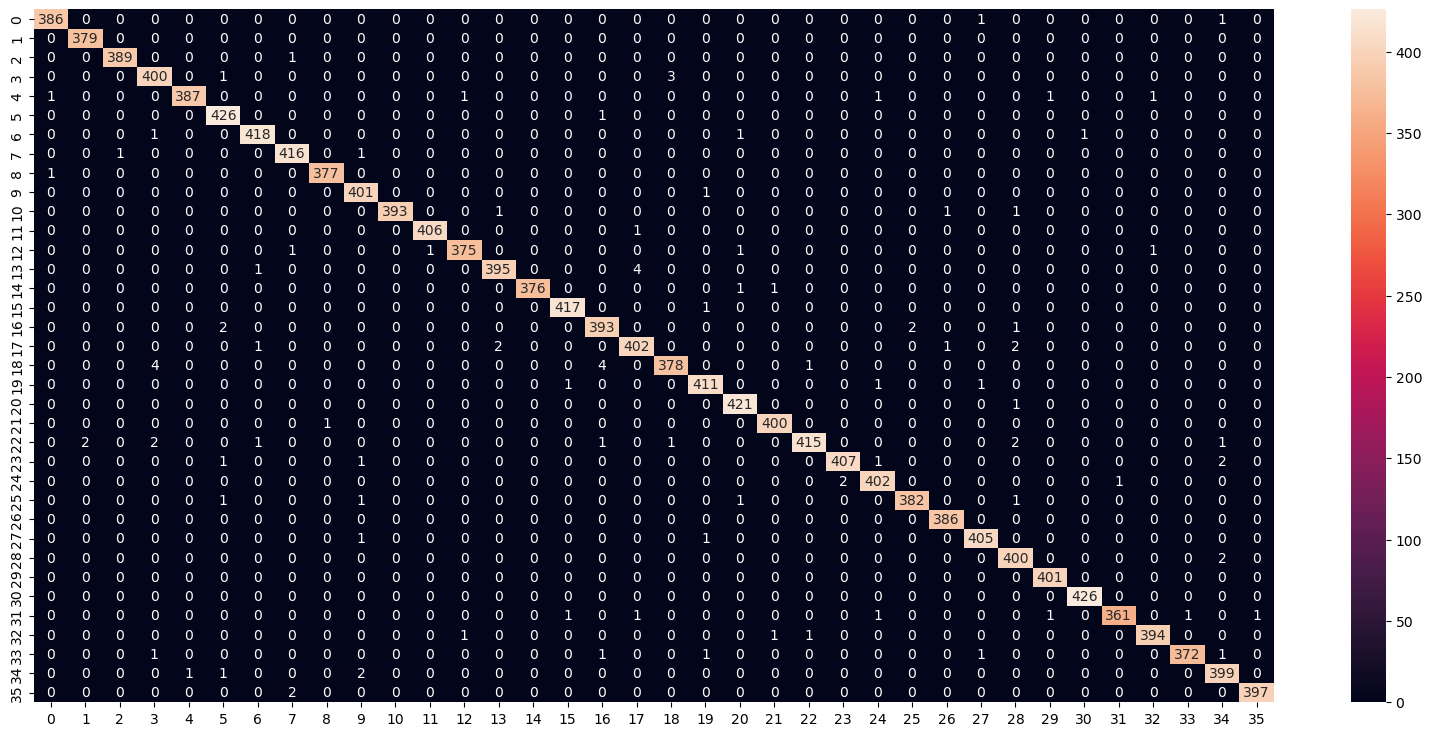

In [20]:
#drawing confusion matrix
plt.figure(figsize=(20,9))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

In [17]:
import matplotlib.pyplot as plt

In [ ]:
model_l=load_model('for_character a=98 v=96.h5')
model_l.predict(img_array.reshape(1,1024))

1/1 [==============================] - 1s 603ms/step


array([[4.0392333e-05, 1.9559612e-07, 8.2322778e-08, 1.4097722e-07,
        8.9985498e-08, 3.2746070e-07, 6.8293757e-06, 1.7141994e-06,
        1.5835735e-07, 4.7137494e-08, 2.6710026e-07, 4.1641390e-05,
        2.7601700e-06, 4.3054711e-06, 2.4397773e-08, 1.2696164e-05,
        2.2811830e-07, 1.6267713e-03, 1.7778234e-08, 3.5075111e-06,
        8.0716966e-08, 2.7169548e-08, 2.5251757e-03, 7.2156831e-07,
        6.2022202e-08, 6.3060372e-07, 2.5445524e-07, 2.4266470e-07,
        9.9540269e-01, 1.8744458e-08, 1.7753813e-05, 3.8324266e-08,
        6.0674711e-07, 7.2893267e-06, 3.0093864e-04, 1.2476740e-06]],
      dtype=float32)

<b>Logisitic Regression Classification:</b>


In [29]:
#doing the pca on the data to see the variance explained by the data
from sklearn.decomposition import PCA,KernelPCA
pca=PCA(random_state=42,n_components=300)
X_pca=pca.fit_transform(X)
print(X_pca.shape)

(72000, 300)


In [30]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression(multi_class='multinomial',max_iter=1000)

In [32]:
lr.fit(X_train_pca,y_train_pca)

e:\conda\condaex\envs\classifier\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [33]:
accuracy_score(y_test_pca,lr.predict(X_test_pca))

0.7078472222222222